In [48]:
import numpy as np
import nibabel as nib
import glob
import matplotlib.pyplot as plt
%matplotlib inline

import os
from glob import glob
import nrrd #pip install pynrrd, if pynrrd is not already installed
import nibabel as nib #pip install nibabel, if nibabel is not already installed
import numpy as np



In [43]:
# !pip install pynrrd

In [46]:


_nrrd = nrrd.read('./100008_ Liver_opp___2_nii_.nrrd')
data = _nrrd[0]
header = _nrrd[1]
print(header)

#save nifti
img = nib.Nifti1Image(data, np.eye(4))
nib.save(img,'100008_ Liver_opp___2.nii.gz')

OrderedDict([('type', 'unsigned short'), ('dimension', 3), ('space', 'left-posterior-superior'), ('sizes', array([320, 260,  96])), ('space directions', array([[-1.40625,  0.     ,  0.     ],
       [ 0.     , -1.40625,  0.     ],
       [ 0.     ,  0.     ,  3.     ]])), ('kinds', ['domain', 'domain', 'domain']), ('endian', 'little'), ('encoding', 'gzip'), ('space origin', array([ 231.09375   ,  214.43591309, -576.76696777])), ('layer_000', '2'), ('layers', '1'), ('modality', 'org.mitk.image.multilabel'), ('org.mitk.label_000_00000', '<?xml version="1.0" ?><Label><property key="center.coordinates" type="Point3dProperty"><point x="0" y="0" z="0" /></property><property key="center.index" type="Point3dProperty"><point x="0" y="0" z="0" /></property><property key="color" type="ColorProperty"><color r="0" g="0" b="0" /></property><property key="layer" type="UIntProperty"><unsigned value="0" /></property><property key="locked" type="BoolProperty"><bool value="false" /></property><property k

In [50]:
import glob
def hist_match(source, template):
    """
    Adjust the pixel values of a grayscale image such that its histogram
    matches that of a target image

    Arguments:
    -----------
        source: np.ndarray
            Image to transform; the histogram is computed over the flattened
            array
        template: np.ndarray
            Template image; can have different dimensions to source
    Returns:
    -----------
        matched: np.ndarray
            The transformed output image
    """

    oldshape = source.shape
    source = source.ravel()
    template = template.ravel()

    # get the set of unique pixel values and their corresponding indices and
    # counts
    s_values, bin_idx, s_counts = np.unique(source, return_inverse=True,
                                            return_counts=True)
    t_values, t_counts = np.unique(template, return_counts=True)

    # take the cumsum of the counts and normalize by the number of pixels to
    # get the empirical cumulative distribution functions for the source and
    # template images (maps pixel value --> quantile)
    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]

    # interpolate linearly to find the pixel values in the template image
    # that correspond most closely to the quantiles in the source image
    interp_t_values = np.interp(s_quantiles, t_quantiles, t_values)

    return interp_t_values[bin_idx].reshape(oldshape)

def image_histogram_equalization(image, number_bins=256):
    # from http://www.janeriksolem.net/2009/06/histogram-equalization-with-python-and.html

    # get image histogram
    image_histogram, bins = np.histogram(image.flatten(), number_bins, density=True)
    cdf = image_histogram.cumsum() # cumulative distribution function
    cdf = 255 * cdf / cdf[-1] # normalize

    # use linear interpolation of cdf to find new pixel values
    image_equalized = np.interp(image.flatten(), bins[:-1], cdf)

    return image_equalized.reshape(image.shape), cdf

if __name__ == '__main__':

    # generate some test data with shape 1000, 1, 96, 96
#     data = np.random.rand(1000, 1, 96, 96)
    paths_orig = glob.glob('/home/abhijit/nas_drive/Data_WholeBody/KORA/KORA_all/KORA_Nifti/KORA2459431/*opp_8.nii.gz')
    print(paths_orig)
    d = nib.load(paths_orig[0])
    kora_data_template = d.get_fdata()
    kora_data_template = kora_data_template.transpose((2, 0, 1))
    print(kora_data_template.shape)
    
    nako_paths = glob.glob('/home/abhijit/nas_drive/Data_WholeBody/NAKO/NAKO_200/MRI/100051/100051_3D_GRE_TRA_opp/*_2.nii.gz')
    print(nako_paths)
    d_nako = nib.load(nako_paths[0])
    nako_data_template = d_nako.get_fdata()
    nako_data_template = nako_data_template.transpose((1, 0, 2))
    print(nako_data_template.shape)
    
#     hist_equalized_nako = hist_match(nako_data_template, kora_data_template)
    
    # loop over them
#     data_equalized = np.zeros(data.shape)
#     data_equalized[:, :, :] = image_histogram_equalization(data)[0]
#     for i in range(data.shape[0]):
#         image = data[i, :, :]
#         data_equalized[i, :, :] = image_histogram_equalization(image)[0]

['/home/abhijit/nas_drive/Data_WholeBody/KORA/KORA_all/KORA_Nifti/KORA2459431/t1_vibe_dixon_cor_caipi6_bh_288_iso_opp_8.nii.gz']
(160, 288, 288)
['/home/abhijit/nas_drive/Data_WholeBody/NAKO/NAKO_200/MRI/100051/100051_3D_GRE_TRA_opp/3D_GRE_TRA_opp_3D_GRE_TRA_2.nii.gz']
(260, 320, 96)


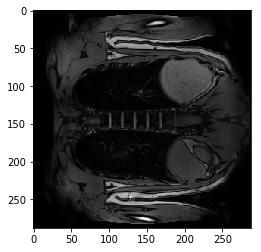

In [51]:
plt.imshow(kora_data_template[120], cmap='gray')
plt.show()

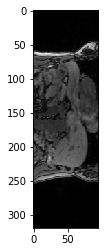

In [52]:
plt.imshow(nako_data_template[120], cmap='gray')
plt.show()

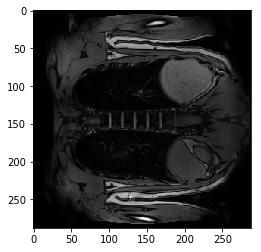

In [56]:
plt.imshow(kora_data_template[110], cmap='gray')
plt.show()

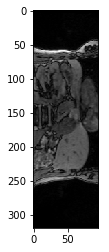

In [55]:
plt.imshow(nako_data_template[110], cmap='gray')
plt.show()

In [57]:
import cv2

In [60]:
!pip install scikit-image


In [61]:
import skimage

In [64]:
d = nib.load('/home/abhijit/nas_drive/Abhijit/Jyotirmay/JJ_conform.mgz')
kora_data_template = d.get_fdata()

print(kora_data_template.shape)    

orig_img_ = np.flip(kora_data_template, 2)

mgz = nib.MGHImage(np.squeeze(orig_img_), np.eye(4), header=d.header)
nib.save(mgz, '1.mgz')
# kora_data_template = kora_data_template.transpose((2, 0, 1))

(256, 256, 256)
